<a href="https://colab.research.google.com/github/suryareddy1376/DeepLearning/blob/main/ImageClassifiaction_using_RestNet50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

In [3]:

!wget -q -P./ https://www.dropbox.com/s/w07liww46kgxo1m/handbags-shoes.zip

In [4]:

# ! rm -rf /content/handbags-shoes

In [5]:
!unzip -qq handbags-shoes.zip

In [6]:
import os,shutil,pathlib

base_dir = pathlib.Path('/content/handbags-shoes')

In [7]:
for category in ('handbags','shoes'):
  fnames = os.listdir(base_dir/category)

  dir = base_dir/ 'train' / category
  os.makedirs(dir)
  for fname in fnames[:50]:
    shutil.copyfile(src = base_dir/category/fname,dst=dir/fname)

  dir = base_dir/ 'validation' / category
  os.makedirs(dir)
  for fname in fnames[50:75]:
    shutil.copyfile(src = base_dir/category/fname,dst=dir/fname)

  dir = base_dir/ 'test' / category
  os.makedirs(dir)
  for fname in fnames[75:]:
    shutil.copyfile(src = base_dir/category/fname,dst=dir/fname)

In [8]:
train_dataset = keras.utils.image_dataset_from_directory(base_dir/'train',image_size=(224,224),batch_size=32)

test_dataset = keras.utils.image_dataset_from_directory(base_dir/'test',image_size=(224,224),batch_size=32)

validation_dataset = keras.utils.image_dataset_from_directory(base_dir/'validation',image_size=(224,224),batch_size=32)


Found 97 files belonging to 2 classes.
Found 38 files belonging to 2 classes.
Found 50 files belonging to 2 classes.


In [9]:
for images,_ in train_dataset.take(1):
  print(images[0].shape)

(224, 224, 3)


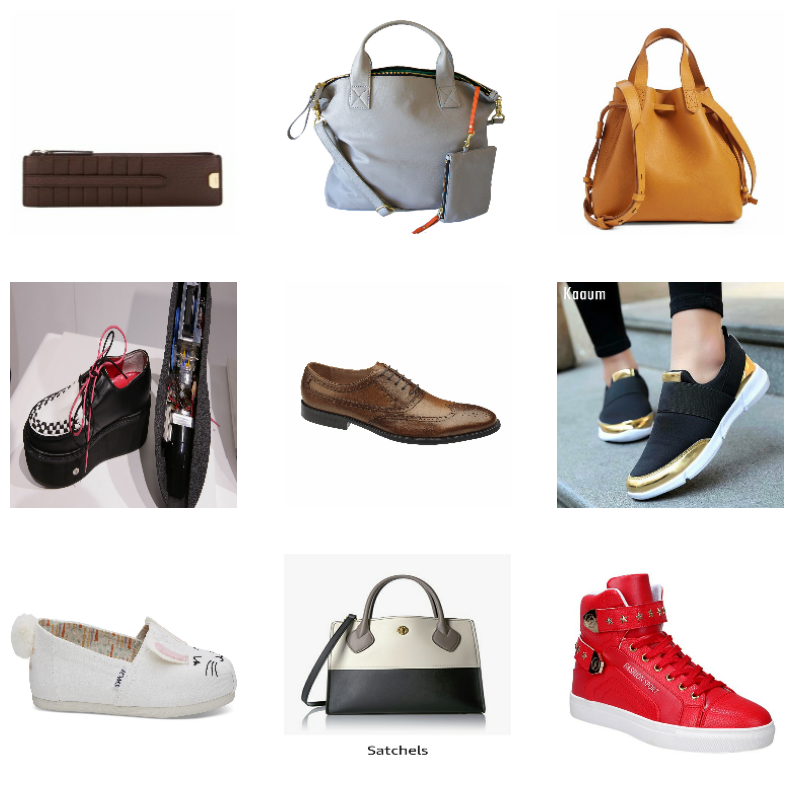

In [10]:

plt.figure(figsize=(10,10))
for images,_ in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3,3,i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.axis("off")

In [11]:
input = keras.Input(shape=(224,224,3))

x = keras.layers.RandomFlip("horizontal")(input)
x = keras.layers.RandomZoom(.1)(x)
x = keras.layers.RandomRotation(.1)(x)

x = keras.layers.Conv2D(32,kernel_size=(2,2),activation="relu",name = "conv_1")(x)

x = keras.layers.MaxPool2D()(x)

x = keras.layers.Conv2D(32,kernel_size=(2,2),activation="relu",name = "conv_2")(x)

x = keras.layers.MaxPool2D()(x)


x = keras.layers.Flatten()(x)


output = keras.layers.Dense(1,activation = "sigmoid")(x)

model = keras.Model(input,output)

In [12]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_flip (RandomFlip)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_zoom (RandomZoom)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_rotation                 │ (None, 224, 224, 3)    │             0 │
│ (RandomRotation)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_1 (Conv2D)                 │ (None, 223, 223, 32)   │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_2 (Conv2D)                 │ (None, 110, 110, 32)   │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 55, 55, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 96800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │        96,801 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,345 (395.88 KB)

 Trainable params: 101,345 (395.88 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
model.compile(loss = "binary_crossentropy" ,optimizer="adam", metrics=["accuracy"])


In [14]:
history = model.fit(train_dataset,epochs=10,validation_data=validation_dataset)

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 223ms/step - accuracy: 0.4762 - loss: 589.0494 - val_accuracy: 0.5000 - val_loss: 181.7084
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 329ms/step - accuracy: 0.6016 - loss: 109.5654 - val_accuracy: 0.5000 - val_loss: 257.3489
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 370ms/step - accuracy: 0.4802 - loss: 195.1829 - val_accuracy: 0.5000 - val_loss: 194.7429
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 197ms/step - accuracy: 0.4885 - loss: 217.0678 - val_accuracy: 0.5000 - val_loss: 98.3750
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 212ms/step - accuracy: 0.5322 - loss: 71.0127 - val_accuracy: 0.5200 - val_loss: 64.2510
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 196ms/step - accuracy: 0.4948 - loss: 44.7134 - val_accuracy: 0.7400 - val_loss: 7.8696
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 207ms/step - accuracy: 0.6639 - loss: 11.5323 - val_accuracy: 0.6000 - val_loss: 24.8303
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 169ms/step - accuracy: 0.5986 - loss: 27.8814 - val_accurac

In [15]:
h = model.evaluate(test_dataset)
print("Accuracy: ",h[1])

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - accuracy: 0.7971 - loss: 4.1447
Accuracy:  0.7894737124443054


In [18]:
restnet50_base = keras.applications.ResNet50(include_top=False,weights='imagenet',input_shape=(224,224,3))

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [19]:
restnet50_base.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_2[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [20]:
def get_features_and_labels(dataset):
  all_features = []
  all_labels = []
  for images,labels in dataset:
    preprocessed_images = keras.applications.resnet50.preprocess_input(images)
    features = restnet50_base.predict(preprocessed_images)
    all_features.append(features)
    all_labels.append(labels)
  return np.concatenate(all_features),np.concatenate(all_labels)

In [21]:
train_features,train_labels = get_features_and_labels(train_dataset)
validation_features,validation_labels = get_features_and_labels(test_dataset)
test_features,test_labels = get_features_and_labels(test_dataset)

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


In [22]:
train_features.shape

(97, 7, 7, 2048)

In [24]:
input = keras.Input(shape=train_features.shape[1:])
h = keras.layers.Flatten()(input)
h = keras.layers.Dense(256,activation="relu")(h)
h = keras.layers.Dropout(.5)(h)
output = keras.layers.Dense(1,activation="sigmoid")(h)
model = keras.Model(input,output)

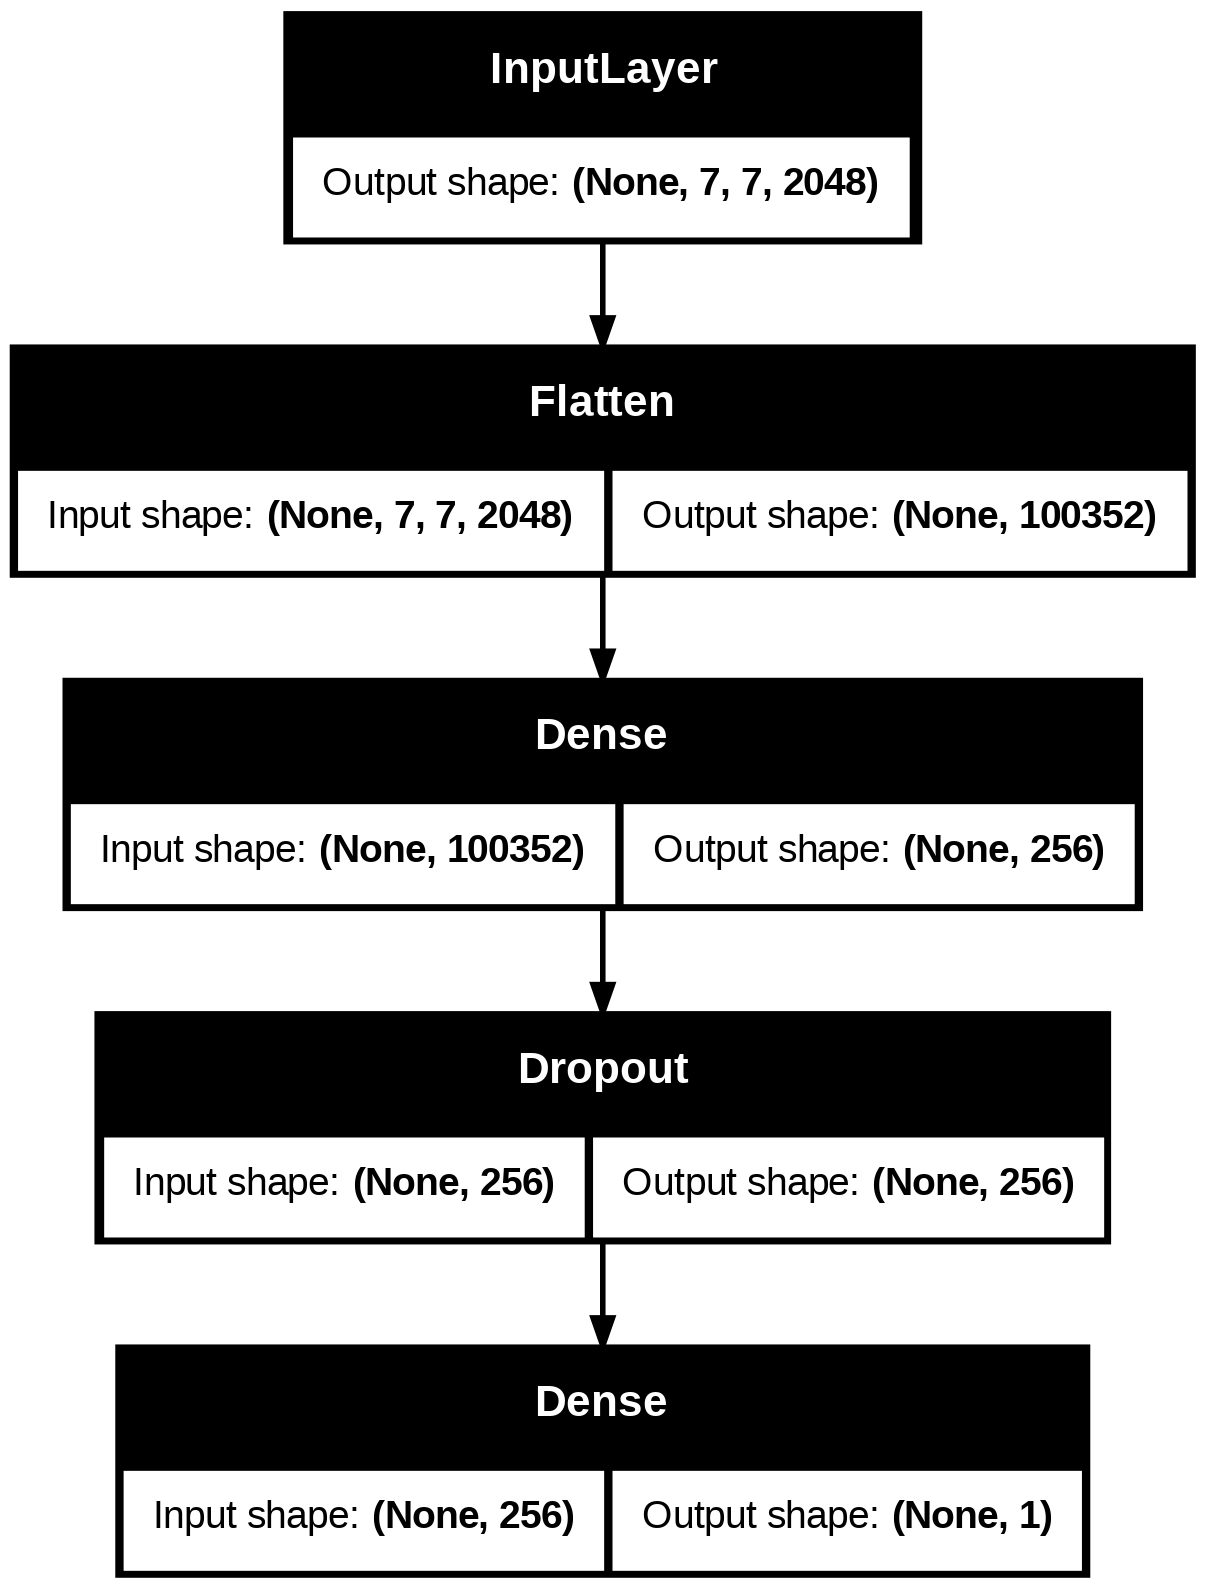

In [25]:
keras.utils.plot_model(model,show_shapes=True)

In [26]:
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 7, 7, 2048)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │    25,690,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,690,625 (98.00 MB)

 Trainable params: 25,690,625 (98.00 MB)

 Non-trainable params: 0 (0.00 B)

In [27]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics = ["accuracy"])

In [28]:
history = model.fit(train_features,train_labels,epochs=10,validation_data=(validation_features,validation_labels))

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 592ms/step - accuracy: 0.5547 - loss: 10.5890 - val_accuracy: 0.7895 - val_loss: 11.5720
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.8848 - loss: 7.1634 - val_accuracy: 0.9474 - val_loss: 1.9315
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 1.0000 - loss: 7.6562e-21 - val_accuracy: 1.0000 - val_loss: 5.5417e-27
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 1.0000 - loss: 8.6299e-08 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 1.0000 - loss: 1.6456e-09 - val_accuracy: 1.0000 - val_loss: 7.1019e-37
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.9938 - loss: 0.2121 - val_accuracy: 1.0000 - val_loss: 1.2042e-38
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.9907 - loss: 0.0525 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 1.0000 - loss: 2.4029e-30 - v

In [29]:

# Let's create the Functions for plotting the Validation error and accuracy curves

def plot_val_los(history):
  plt.clf()
  history_dict = history.history
  loss = history_dict['loss']
  val_loss_values = history_dict['val_loss']
  epochs = range(1,len(val_loss_values)+1)
  plt.plot(epochs,loss,"ro",label = "Training Loss")
  plt.plot(epochs,val_loss_values,"b",label = "Validation Loss")
  plt.title("Training and Validation Loss")
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.show()


def plot_acc_los(history):
  plt.clf()
  history_dict = history.history
  accuracy = history_dict['accuracy']
  val_acc = history_dict['val_accuracy']
  epochs = range(1,len(accuracy)+1)
  plt.plot(epochs,accuracy,"ro",label = "Training accuracy")
  plt.plot(epochs,val_acc,"b",label = "Validation accuracy")
  plt.title("Accuracy")
  plt.xlabel("Epochs")
  plt.ylabel("Accuracy")
  plt.show()


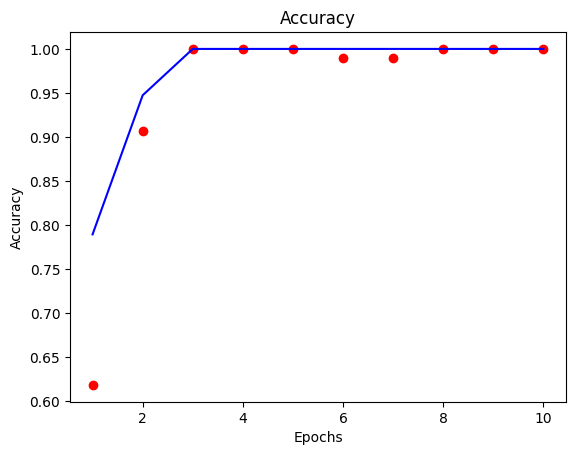

In [30]:
plot_acc_los(history)

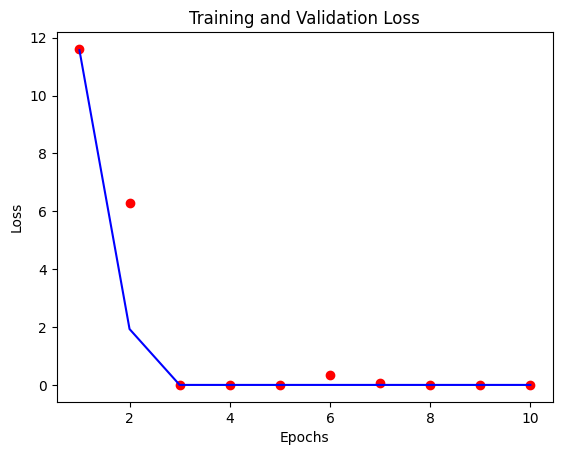

In [31]:
plot_val_los(history)

In [32]:
model.evaluate(test_features,test_labels)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 1.0000 - loss: 5.6178e-42


[0.0, 1.0]